> **Given a max-heap, represented as an array A, design an algorithm that computes the k largest elements stored in the max-heap. You cannot modify the heap. For example, if the heap is the one shown in Figure 10.1(a) on Page 132, then the array representation is [561,314,401,28,156,359,271,11,3], the four largest elements are 561,314,401, and 359.** 

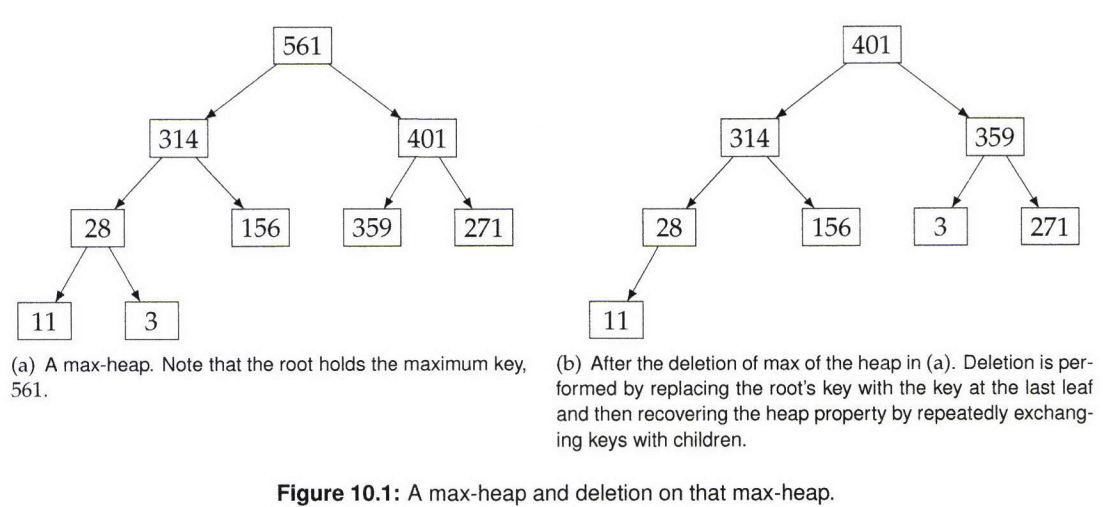

In [1]:
from typing import List
import heapq as q

# Time complexity: O(klogk) | Space complexity: O(k)
def k_largest_in_binary_heap(A: List[int], k: int) -> List[int]:
    if k <= 0:
        return []
    
    maxHeap = []
    maxHeap.append((-A[0], 0))
    
    result = []
    
    for _ in range(k):
        item_index = maxHeap[0][1]
        result.append(-q.heappop(maxHeap)[0])
        
        left_child_index = (2 * item_index) + 1
        if left_child_index < len(A):
            q.heappush(maxHeap, (-A[left_child_index], left_child_index))
        right_child_index = (2 * item_index) + 2
        if right_child_index < len(A):
            q.heappush(maxHeap, (-A[right_child_index], right_child_index))
    return result

    


> **LeetCode 871. Minimum Number of Refueling Stops**

[LeetCode 871. Minimum Number of Refueling Stops](https://leetcode.com/problems/minimum-number-of-refueling-stops/)

- [Youtube: Video Solution Walk-through](https://www.youtube.com/watch?v=fQknzHvPAqU&ab_channel=TechBayArea-AnkurKuchlous)


> **A car travels from a starting position to a destination which is target miles east of the starting position. Along the way, there are gas stations.  Each $station[i]$ represents a gas station that is $station[i][0]$ miles east of the starting position, and has $station[i][1]$ liters of gas.
The car starts with an infinite tank of gas, which initially has startFuel liters of fuel in it.  It uses 1 liter of gas per 1 mile that it drives.
When the car reaches a gas station, it may stop and refuel, transferring all the gas from the station into the car.
What is the least number of refueling stops the car must make in order to reach its destination?  If it cannot reach the destination, return -1.
Note that if the car reaches a gas station with 0 fuel left, the car can still refuel there.  If the car reaches the destination with 0 fuel left, it is still considered to have arrived.**

- Example 1:
```python
Input: target = 1, startFuel = 1, stations = []
Output: 0
Explanation: We can reach the target without refueling.
```

- Example 2:
```
Input: target = 100, startFuel = 1, stations = [[10,100]]
Output: -1
Explanation: We can't reach the target (or even the first gas station).
```

- Example 3:
```
Input: target = 100, startFuel = 10, stations = [[10,60],[20,30],[30,30],[60,40]]
Output: 2
Explanation: 
We start with 10 liters of fuel. We drive to position 10, expending 10 liters of fuel.  We refuel from 0 liters to 60 liters of gas. Then, we drive from position 10 to position 60 (expending 50 liters of fuel),
and refuel from 10 liters to 50 liters of gas.  We then drive to and reach the target.
We made 2 refueling stops along the way, so we return 2.
```


In [101]:
import heapq as HQ
from typing import List

# Input: target = 100, startFuel = 10, stations = [[10,60],[20,30],[30,30],[60,40]]

def minRefuelStops(target: int, startFuel: int, stations: List[List[int]]) -> int:
    stations.append([target, 0])
    stops = 0
    prev_stop = 0
    fuel = startFuel

    maxHQ = []
    print("Start Fuel:", startFuel)
     # Travel as far as possible keeping track of the previous station
        # Until out of fuel/gas
    for miles, gas in stations:
        fuel -= (miles - prev_stop)
        target = target - fuel

        while fuel < 0 and maxHQ:
            fuel += -(HQ.heappop(maxHQ))
            stops += 1

        if fuel < 0: return -1
        HQ.heappush(maxHQ, -gas)
        prev_stop = miles

    return stops

print("Minimum stops is: ", minRefuelStops(100, 50, [[10,60],[20,30],[30,30],[60,40]]))

Start Fuel: 50
Minimum stops is:  1
